<b>¡Hola Alejandra!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que deberás atender para aprobar la revisión.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Es factible que, a lo largo del proceso de revisión, quieras dejarme comentarios. Si es el caso, por favor realízalo dentro de celdas azules como esta.
</div>
Respecto del proceso de revisión, tu proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos.
¡Empecemos!

# Analitica de métricas y Recomendaciones de Marketing para al empresa Showz

##  Objetivo 

Optimizar los gastos de Marketing de la empresa Showz encargada de la venta de boletos para eventos

Para la resolución y análisis de estos datos es necesario tener en mente las siguientes preguntas que son clave para acercarnos a una conclusión mas acertada. 

¿Cómo los clientes usan el servicio?
¿Cuándo empiezan a comprar?
¿Cuánto dinero aporta cada cliente a la compañía?
¿Cuándo los ingresos cubren el costo de adquisición de los clientes?

## Visualizacion y exploración de datos

In [2]:
#Se importan las librerias que se van a utilizar en el desarrollo del análisis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns


In [3]:
#Cargue de los DF correspondientes

visitas=pd.read_csv('/datasets/visits_log_us.csv') 
ordenes=pd.read_csv('/datasets/orders_log_us.csv')
costos=pd.read_csv('/datasets/costs_us.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/datasets/visits_log_us.csv'

### Visitas

In [ ]:
#Visualización del primer DF
visitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [ ]:
#Cambio de los nombres de las columnas. Se reemplazan los espacios por escritura sanke case y las mayusculas por minusculas

new_columns=[]

for column in visitas.columns:
    modified_columns=column.lower().replace(" ","_")
    new_columns.append(modified_columns)
    
visitas.columns=new_columns

print(visitas.columns)

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')


In [ ]:
#Se cambia el tipo de dato de las columnas ends_ts y start_ts a tipo datetime

visitas['start_ts']=pd.to_datetime(visitas['start_ts'])
visitas['end_ts']=pd.to_datetime(visitas['end_ts'])

visitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [ ]:
visitas.head(10)

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [ ]:
#Verificacion de la fecha maxima de registros
visitas['start_ts'].max()

Timestamp('2018-05-31 23:59:00')

In [ ]:
#Verificacion de la fecha minima de registros
visitas['start_ts'].min()

Timestamp('2017-06-01 00:01:00')

### Ordenes 

In [ ]:
#Visualización del segundo DF

ordenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [ ]:
#Cambio de los nombres de las columnas. Se reemplazan los espacios por escritura sanke case y las mayusculas por minusculas

new_columns=[]

for column in ordenes.columns:
    modified_columns=column.lower().replace(" ","_")
    new_columns.append(modified_columns)
    
ordenes.columns=new_columns

print(ordenes.columns)

Index(['buy_ts', 'revenue', 'uid'], dtype='object')


In [ ]:
#Se cambia el tipo de dato de la columna buy_ts a tipo datetime

ordenes['buy_ts']=pd.to_datetime(ordenes['buy_ts'])

ordenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [ ]:
ordenes.head(10)

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


### Costos

In [ ]:
#Visualización del tercer DF

costos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [ ]:
#Se cambia el tipo de dato de la columna dt a tipo datetime

costos['dt']=pd.to_datetime(costos['dt'])

costos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [ ]:
costos.head(10)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


<div class="alert alert-block alert-success">
<b>Celdas [1–15]</b> <a class="tocSkip"></a><br>
Muy buen trabajo en esta fase inicial. La carga y exploración de los datasets está bien organizada. Se aplican correctamente las conversiones de tipos de datos a `datetime` donde corresponde, se normalizan los nombres de columnas, y se valida el contenido de los dataframes con `info()` y `head()`. Este inicio ordenado y meticuloso facilita el análisis posterior. Bien hecho.
</div>


## Análisis de las metricas

Se va a realizar el analisis de los datos por Data Frame, cabe resaltar que Showz es una empresa de venta de entradas de eventos

### Visitas

Queremos resolver las siguientes preguntas:

¿Cuántas personas usan la app cada día, semana y mes?
¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).
¿Cuál es la duración de cada sesión?
¿Con qué frecuencia los usuarios regresan?

In [ ]:
#Duracion de cada sesion
visitas['duracion_min'] = (visitas['end_ts'] - visitas['start_ts']).dt.total_seconds() / 60

visitas

,device,end_ts,source_id,start_ts,uid,duracion_min
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,18.000000
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,28.000000
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0.000000
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,24.000000
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0.000000
...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,0.316667
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,0.316667
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,0.316667
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,0.316667


In [ ]:
#Usuarios unicos por dia

usuarios_diarios=visitas.groupby('start_ts')['uid'].nunique().reset_index()

usuarios_diarios

,start_ts,uid
0,2017-06-01 00:01:00,1
1,2017-06-01 00:02:00,2
2,2017-06-01 00:04:00,1
3,2017-06-01 00:09:00,1
4,2017-06-01 00:14:00,3
...,...,...
224298,2018-05-31 23:54:00,5
224299,2018-05-31 23:56:00,1
224300,2018-05-31 23:57:00,2
224301,2018-05-31 23:58:00,1


In [ ]:
# Sesiones por dia

sesiones_diarias=visitas.groupby('start_ts')['uid'].count().reset_index()
sesiones_diarias

,start_ts,uid
0,2017-06-01 00:01:00,1
1,2017-06-01 00:02:00,2
2,2017-06-01 00:04:00,1
3,2017-06-01 00:09:00,1
4,2017-06-01 00:14:00,3
...,...,...
224298,2018-05-31 23:54:00,5
224299,2018-05-31 23:56:00,1
224300,2018-05-31 23:57:00,2
224301,2018-05-31 23:58:00,1


In [ ]:
#Creacion de columnas para los dias, semanas, meses y años

visitas[['año_inicio','semana_inicio', 'dia_inicio']]=visitas['start_ts'].dt.isocalendar()

visitas['mes_inicio']=visitas['start_ts'].dt.month

visitas['mes_final']=visitas['end_ts'].dt.month


visitas


,device,end_ts,source_id,start_ts,uid,duracion_min,año_inicio,semana_inicio,dia_inicio,mes_inicio,mes_final
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,18.000000,2017,51,3,12,12
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,28.000000,2018,8,1,2,2
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0.000000,2017,26,6,7,7
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,24.000000,2018,20,7,5,5
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0.000000,2017,52,3,12,12
...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,0.316667,2017,30,6,7,7
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,0.316667,2018,4,4,1,1
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,0.316667,2018,9,6,3,3
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,0.316667,2017,44,4,11,11


In [ ]:
#Agrupacion de datos por año

visitas_año=visitas.groupby('año_inicio')['uid'].nunique()
print('Usuarios unicos- anuales:')

visitas_año

Usuarios unicos- anuales:


año_inicio
2017    131777
2018    112535
Name: uid, dtype: int64

In [ ]:
#Agrupacion de datos por meses

visitas_mes=visitas.groupby(['año_inicio','mes_inicio'])['uid'].nunique().reset_index()

print('Usuarios unicos -mensuales:')
visitas_mes

Usuarios unicos -mensuales:


,año_inicio,mes_inicio,uid
0,2017,6,13259
1,2017,7,14183
2,2017,8,11631
3,2017,9,18975
4,2017,10,29692
5,2017,11,32797
6,2017,12,31557
7,2018,1,28716
8,2018,2,28749
9,2018,3,27473


In [ ]:
#Agrupacion de datos por semanas

visitas_semanal=visitas.groupby(['año_inicio','semana_inicio'])['uid'].nunique().reset_index()
print('Usuarios unicos -semanales:')

visitas_semanal.head(10)

Usuarios unicos -semanales:


,año_inicio,semana_inicio,uid
0,2017,22,2021
1,2017,23,4129
2,2017,24,2812
3,2017,25,2878
4,2017,26,3064
5,2017,27,3294
6,2017,28,4355
7,2017,29,3841
8,2017,30,2655
9,2017,31,2364


In [ ]:
#Agrupacion de datos por dias, donde el lunes comienza en 1 y se cuenta de manera consecutiva hasta el domingo que seria 7

visitas_diario=visitas.groupby(['año_inicio','dia_inicio'])['uid'].nunique().reset_index()
print('Usuarios unicos -diario:')
visitas_diario

Usuarios unicos -diario:


,año_inicio,dia_inicio,uid
0,2017,1,25217
1,2017,2,24073
2,2017,3,23559
3,2017,4,25578
4,2017,5,26378
5,2017,6,20141
6,2017,7,19546
7,2018,1,21466
8,2018,2,21265
9,2018,3,20737


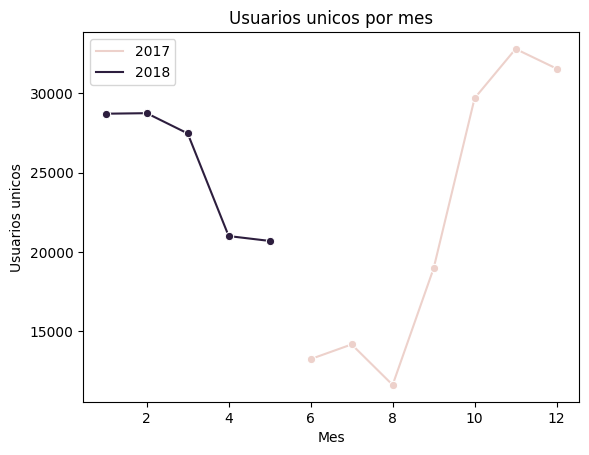

In [ ]:
# Comportamiento de los usuarios segun el mes
sns.lineplot(data=visitas_mes, x="mes_inicio", y="uid", hue= "año_inicio", marker="o")

plt.xlabel("Mes")
plt.ylabel("Usuarios unicos")
plt.title("Usuarios unicos por mes")
plt.legend()
plt.show()

La grafica muestra que en el 2017 hubo mayor uso de la app por mes, luego del paso de los meses, se evidencia que la frecuencia disminuye

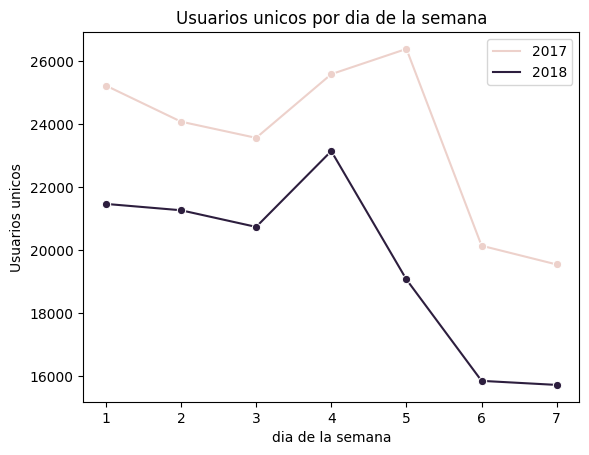

In [ ]:
#comportamiento de los usuarios segun el dia de la semana
sns.lineplot(data=visitas_diario, x="dia_inicio", y="uid", hue= "año_inicio", marker="o")

plt.xlabel("dia de la semana")
plt.ylabel("Usuarios unicos")
plt.title("Usuarios unicos por dia de la semana")
plt.legend()
plt.show()

Se evidencia un comportamiento parecido para los dos años. Los dias jueves suelen tener mayor demanda de usuarios, mientras que a medida que se acerca el fin de semana las personas no suelen comprar boleteria.

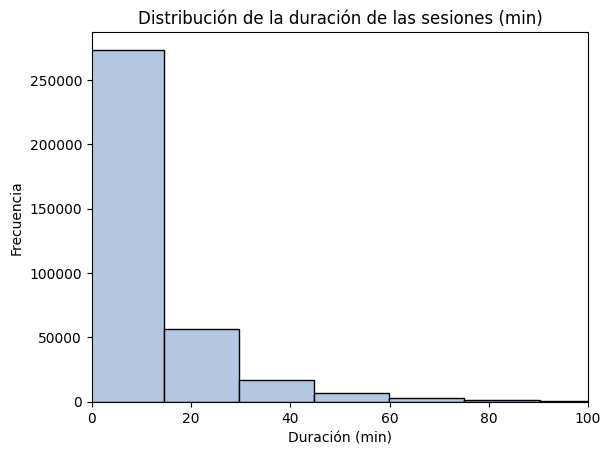

In [ ]:
# Distribución de la duración de las sesiones

plt.hist(visitas['duracion_min'], bins=50, color='#b5c6e0',edgecolor='black')
plt.title('Distribución de la duración de las sesiones (min)')
plt.xlim(0,100)
plt.xlabel('Duración (min)')
plt.ylabel('Frecuencia')
plt.show()

La grafica muestra una distribucion sesgada a la derecha, indicando que la mayoria de los usuarios tardan entre 15-20 minutos en la aplicacion

In [ ]:
#Frecuencia con la que los usuarios regresan por cohortes mensuales

visitas_ordenadas = visitas.sort_values(by=['año_inicio','uid', 'mes_inicio']) #se organizan los valores en orden cronologico
visitas_ordenadas['visita_previa'] =visitas_ordenadas.groupby('uid')['mes_inicio'].shift(1) # se calcula la visita anterior del mismo usuario
visitas_ordenadas['meses_desde_ultima_visita'] = (visitas_ordenadas['mes_inicio'] - visitas_ordenadas['visita_previa']) # Se cuentan cuantos dias han pasado desde la ultima visita

display(visitas_ordenadas[['uid', 'mes_inicio', 'visita_previa', 'meses_desde_ultima_visita']].head(10))


,uid,mes_inicio,visita_previa,meses_desde_ultima_visita
173818,297729379853735,6,NaN,NaN
173142,313578113262317,9,NaN,NaN
34588,325320750514679,9,NaN,NaN
183750,407573351275847,6,NaN,NaN
141543,526778907996220,10,NaN,NaN
307329,526778907996220,10,10.0,0.0
2566,673910773442622,9,NaN,NaN
230869,801587065806307,10,NaN,NaN
217886,1260655184775459,10,NaN,NaN
285441,1260655184775459,10,10.0,0.0


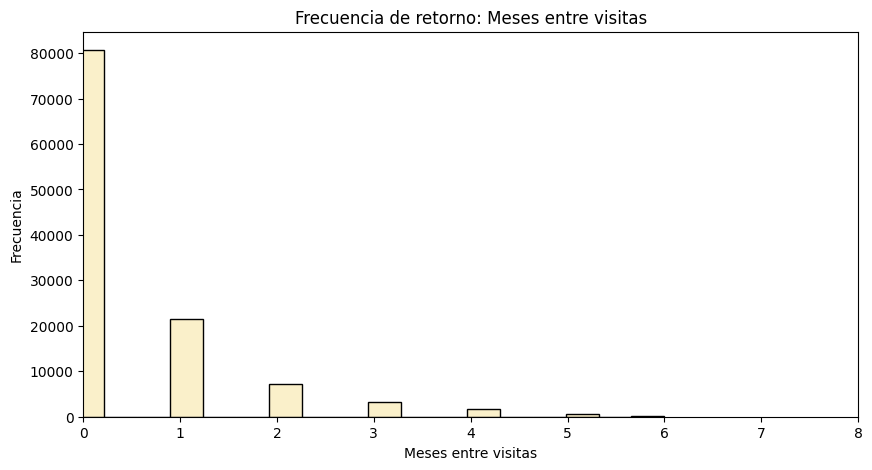

In [ ]:
# Distribución de la duración de las sesiones (sin valores nulos)

plt.figure(figsize=(10, 5))
plt.hist(visitas_ordenadas['meses_desde_ultima_visita'].dropna(), bins=50, color='#faf0ca', edgecolor='black')
plt.title('Frecuencia de retorno: Meses entre visitas')
plt.xlim(0,8)
plt.xlabel('Meses entre visitas')
plt.ylabel('Frecuencia')
plt.show()

<div class="alert alert-block alert-success">
<b>Celdas [16–28]</b> <a class="tocSkip"></a><br>
Excelente análisis de comportamiento de visitas. Se destaca el uso adecuado de cohortes, análisis de sesiones por distintos rangos temporales (día, semana, mes), y visualización clara de patrones de comportamiento. La interpretación de la distribución de duración de sesiones y frecuencia de retorno está bien sustentada.
</div>


La mayoria de usuarios tienden a volver entre 0 y 1 mes. Sin embargo, hay otros usuarios que tienen a volver hasta 6 meses despues.

### Ventas/ Ordenes

In [ ]:
ordenes.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


#### Tiempo de conversion de los clientes 

In [ ]:
#Fecha de compra convertida a mes.
ordenes['año_compra']=ordenes['buy_ts'].dt.year
ordenes['mes_compra']=ordenes['buy_ts'].dt.month

ordenes

,buy_ts,revenue,uid,año_compra,mes_compra
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017,6
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017,6
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017,6
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017,6
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017,6
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018,5
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018,5
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018,5
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018,5


In [ ]:
#Calcula la primera visita de cada cliente eliminando posibles ingresos del mismo cliente
primera_visita=visitas.sort_values(['uid','año_inicio','mes_inicio']).drop_duplicates('uid', keep='first')

display(primera_visita[['uid','año_inicio','mes_inicio']])


,uid,año_inicio,mes_inicio
196543,11863502262781,2018,3
257333,49537067089222,2018,2
173818,297729379853735,2017,6
173142,313578113262317,2017,9
34588,325320750514679,2017,9
...,...,...,...
286167,18446403737806311543,2017,11
175259,18446424184725333426,2017,12
293449,18446556406699109058,2018,1
319162,18446621818809592527,2017,12


In [ ]:
#Calcula la primera compra de cada cliente, se eliminan las demas ordenes para cada cliente, solo se deja la primera
primera_compra=ordenes.sort_values(['uid','año_compra','mes_compra']).drop_duplicates('uid', keep='first')
display(primera_compra[['uid','año_compra','mes_compra']])

,uid,año_compra,mes_compra
27944,313578113262317,2018,1
213,1575281904278712,2017,6
12235,2429014661409475,2017,10
31462,2464366381792757,2018,1
19140,2551852515556206,2017,11
...,...,...,...
19096,18445147675727495770,2017,11
8707,18445407535914413204,2017,9
42213,18445601152732270159,2018,3
35572,18446156210226471712,2018,2


In [ ]:
#Unir las dos tablas de primera compra y primera visita para calcular la diferencia en meses de las dos acciones

conversion = pd.merge(primera_visita, primera_compra, on='uid', how='inner')

display(conversion[['uid','año_compra','mes_compra','año_inicio','mes_inicio']])
        

,uid,año_compra,mes_compra,año_inicio,mes_inicio
0,313578113262317,2018,1,2017,9
1,1575281904278712,2017,6,2017,6
2,2429014661409475,2017,10,2017,10
3,2464366381792757,2018,1,2018,1
4,2551852515556206,2017,11,2017,11
...,...,...,...,...,...
36518,18445147675727495770,2017,11,2017,8
36519,18445407535914413204,2017,9,2017,9
36520,18445601152732270159,2018,3,2017,8
36521,18446156210226471712,2018,2,2017,11


In [ ]:
# Se tienen que considerar los años de diferencia tambien para evitar calculos erroneos en los meses

conversion['conversion_meses'] = ((conversion['año_compra'] - conversion['año_inicio'])*12 +
(conversion['mes_compra'] - conversion['mes_inicio']))

display(conversion[['uid','año_compra','mes_compra','año_inicio','mes_inicio','conversion_meses']])


,uid,año_compra,mes_compra,año_inicio,mes_inicio,conversion_meses
0,313578113262317,2018,1,2017,9,4
1,1575281904278712,2017,6,2017,6,0
2,2429014661409475,2017,10,2017,10,0
3,2464366381792757,2018,1,2018,1,0
4,2551852515556206,2017,11,2017,11,0
...,...,...,...,...,...,...
36518,18445147675727495770,2017,11,2017,8,3
36519,18445407535914413204,2017,9,2017,9,0
36520,18445601152732270159,2018,3,2017,8,7
36521,18446156210226471712,2018,2,2017,11,3


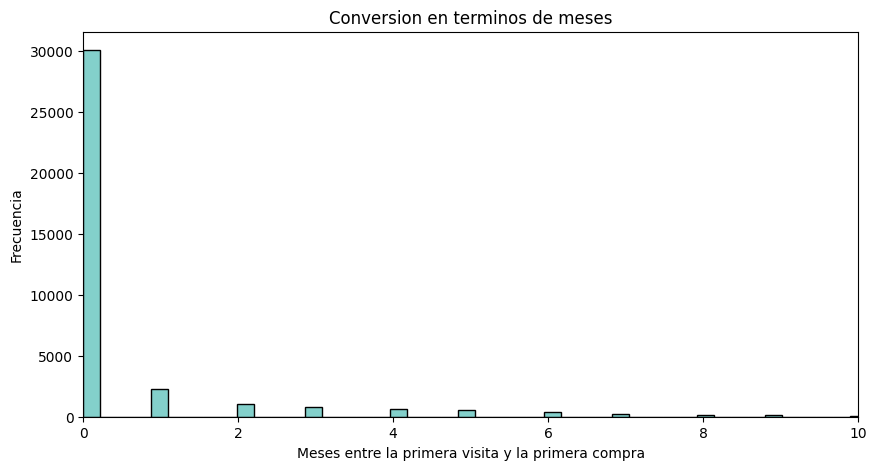

In [ ]:
# Distribución de la conversion de los clientes por mes

plt.figure(figsize=(10, 5))
plt.hist(conversion['conversion_meses'], bins=50, color='#83d0cb', edgecolor='black')
plt.title('Conversion en terminos de meses')
plt.xlim(0,10)
plt.xlabel('Meses entre la primera visita y la primera compra')
plt.ylabel('Frecuencia')
plt.show()

<div class="alert alert-block alert-success">
<b>Celdas [30–35]</b> <a class="tocSkip"></a><br>
Muy bien estructurado el cálculo del tiempo de conversión entre primera visita y primera compra. El manejo de fechas es preciso, se evita el error común de ignorar el año, y la visualización final apoya de forma clara la interpretación.
</div>


La gran mayoria de los clientes tiende a comprar el mismo mes de la primera visita

####  Pedidos que realizan los clientes por mes

In [ ]:
#Se van a contabiliar la cantidad de boletas que compraron los clientes por mes

pedidos_clientes_mes=ordenes.groupby(['año_compra','mes_compra'])['uid'].count().reset_index()
pedidos_clientes_mes

,año_compra,mes_compra,uid
0,2017,6,2354
1,2017,7,2363
2,2017,8,1807
3,2017,9,3387
4,2017,10,5679
5,2017,11,5659
6,2017,12,6218
7,2018,1,4721
8,2018,2,5281
9,2018,3,5326


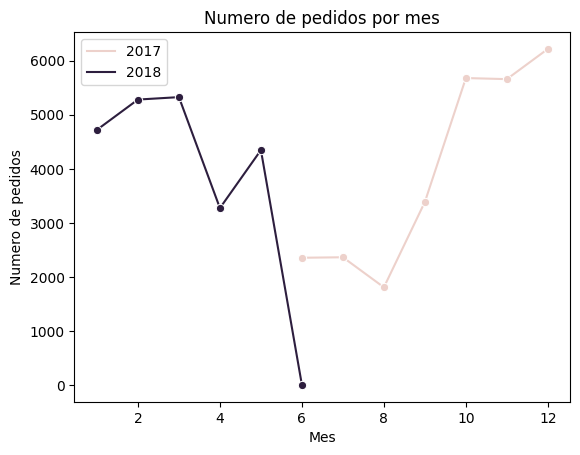

In [ ]:
#Variacion de la compra de boletos segun el mes

sns.lineplot(data=pedidos_clientes_mes, x="mes_compra", y="uid", hue= "año_compra", marker="o")

plt.xlabel("Mes")
plt.ylabel("Numero de pedidos")
plt.title("Numero de pedidos por mes")
plt.legend()
plt.show()

Se evidencia una caida significativa de compra de boleteria desde el 2017 al 2018

####  Tamaño promedio de compra

In [ ]:
#Ingreso promedio por mes

ganancia_mes=ordenes.groupby(['año_compra','mes_compra'])['revenue'].mean().reset_index()
ganancia_mes

,año_compra,mes_compra,revenue
0,2017,6,4.060106
1,2017,7,5.306589
2,2017,8,4.847139
3,2017,9,5.416448
4,2017,10,4.928280
5,2017,11,4.783518
6,2017,12,5.852139
7,2018,1,4.112927
8,2018,2,4.840095
9,2018,3,5.413930


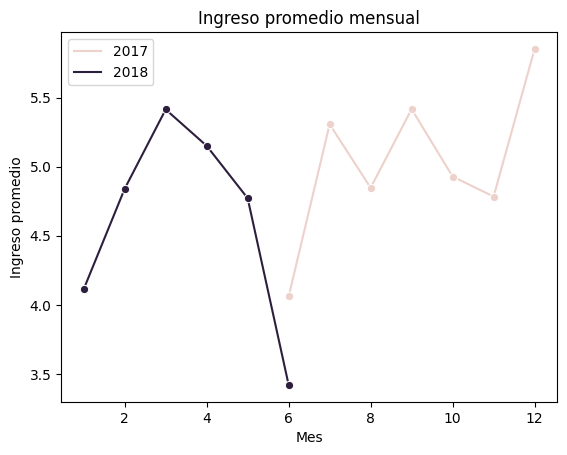

In [ ]:
#Grafica del comportamiento del promedio del ingreso mensual
sns.lineplot(data=ganancia_mes, x="mes_compra", y="revenue", hue= "año_compra", marker="o")

plt.xlabel("Mes")
plt.ylabel("Ingreso promedio")
plt.title("Ingreso promedio mensual")
plt.legend()
plt.show()

<div class="alert alert-block alert-success">
<b>Celdas [36–39]</b> <a class="tocSkip"></a><br>
Buen análisis del comportamiento mensual de pedidos y del ingreso promedio. Las visualizaciones están bien elegidas para identificar estacionalidad y caídas relevantes. La interpretación también es clara y conectada con el objetivo del negocio.
</div>


In [ ]:
#Tamaño del ingreso en general

tamaño_general=ordenes['revenue'].mean()

print(f"El tamaño promedio del ingreso es: ${tamaño_general.round()}")

El tamaño promedio del ingreso es: $5.0


####  LifeTime Value -Dinero que dejan los clientes mensualmente

In [ ]:
# Lifetime Value (LTV) por usuarios mensuales

ltv_mes=ordenes.groupby(['año_compra','mes_compra'])['revenue'].sum().reset_index()
ltv_mes

,año_compra,mes_compra,revenue
0,2017,6,9557.49
1,2017,7,12539.47
2,2017,8,8758.78
3,2017,9,18345.51
4,2017,10,27987.70
5,2017,11,27069.93
6,2017,12,36388.60
7,2018,1,19417.13
8,2018,2,25560.54
9,2018,3,28834.59


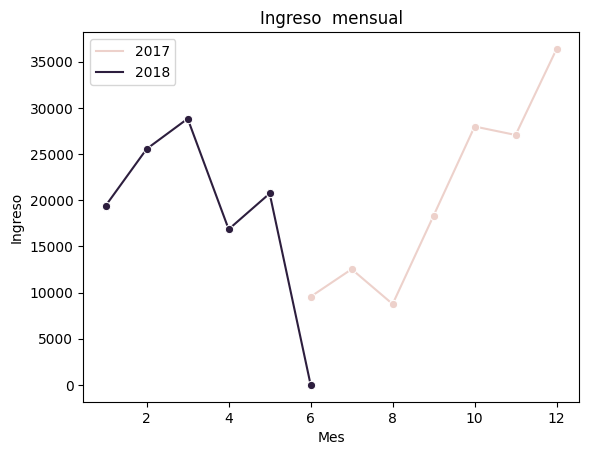

In [ ]:
#Grafica del comportamiento del promedio del ingreso mensual
sns.lineplot(data=ltv_mes, x="mes_compra", y="revenue", hue= "año_compra", marker="o")

plt.xlabel("Mes")
plt.ylabel("Ingreso")
plt.title("Ingreso  mensual")
plt.legend()
plt.show()

<div class="alert alert-block alert-warning">
<b>Celdas [41–42]</b> <a class="tocSkip"></a><br>
El análisis del LTV mensual está bien orientado, pero sería más sólido si se presentara por cohorte y en un mapa de calor conforme a la teoría del Sprint. Al final del proyecto dejo unas líneas de código para apoyarte con esta tarea.  
    
    
</div>


La grafica muestra como hay un incremento significativo el segundo semestre del 2017 y luego una disminucion en los ingresos para el primer semestre del 2018. Necesitariamos mas datos para identificar si es un comportamiento patron siempre en todos los años o identificar la razon de la caida abrupta para el primer semestre

In [ ]:
conversion.head()

,device,end_ts,source_id,start_ts,uid,duracion_min,año_inicio,semana_inicio,dia_inicio,mes_inicio,mes_final,buy_ts,revenue,año_compra,mes_compra,conversion_meses
0,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,313578113262317,18.0,2017,38,1,9,9,2018-01-03 21:51:00,0.55,2018,1,4
1,touch,2017-06-03 10:17:00,10,2017-06-03 10:13:00,1575281904278712,4.0,2017,22,6,6,6,2017-06-03 10:13:00,1.22,2017,6,0
2,desktop,2017-10-11 17:27:00,3,2017-10-11 17:14:00,2429014661409475,13.0,2017,41,3,10,10,2017-10-11 18:33:00,73.33,2017,10,0
3,desktop,2018-01-27 20:13:00,5,2018-01-27 20:10:00,2464366381792757,3.0,2018,4,6,1,1,2018-01-28 15:54:00,2.44,2018,1,0
4,desktop,2017-11-24 11:31:00,5,2017-11-24 11:22:00,2551852515556206,9.0,2017,47,5,11,11,2017-11-24 10:14:00,6.32,2017,11,0


In [ ]:
#Determinar el tamaño de cada cohorte

cohorte_tamaño=conversion.groupby(['año_compra','mes_compra','conversion_meses']).agg({'uid':'nunique','revenue': 'sum'}).reset_index()
cohorte_tamaño

,año_compra,mes_compra,conversion_meses,uid,revenue
0,2017,6,0,2023,8060.32
1,2017,7,0,1753,8778.13
2,2017,7,1,170,1066.52
3,2017,8,0,1208,5528.15
4,2017,8,1,95,460.94
...,...,...,...,...,...
74,2018,5,8,42,156.62
75,2018,5,9,25,106.74
76,2018,5,10,33,111.21
77,2018,5,11,54,591.37


In [ ]:
#Cambio del nombre de las columnas
cohorte_tamaño.columns = ['año_compra', 'mes_compra', 'edad_cohorte','num_compradores','ingresos']
cohorte_tamaño

,año_compra,mes_compra,edad_cohorte,num_compradores,ingresos
0,2017,6,0,2023,8060.32
1,2017,7,0,1753,8778.13
2,2017,7,1,170,1066.52
3,2017,8,0,1208,5528.15
4,2017,8,1,95,460.94
...,...,...,...,...,...
74,2018,5,8,42,156.62
75,2018,5,9,25,106.74
76,2018,5,10,33,111.21
77,2018,5,11,54,591.37


In [ ]:
# Calcula el LTV dividiendo los ingresos por el número de compradores.
cohorte_tamaño['ltv'] = cohorte_tamaño['ingresos'] / cohorte_tamaño['num_compradores']
cohorte_tamaño


,año_compra,mes_compra,edad_cohorte,num_compradores,ingresos,ltv
0,2017,6,0,2023,8060.32,3.984340
1,2017,7,0,1753,8778.13,5.007490
2,2017,7,1,170,1066.52,6.273647
3,2017,8,0,1208,5528.15,4.576283
4,2017,8,1,95,460.94,4.852000
...,...,...,...,...,...,...
74,2018,5,8,42,156.62,3.729048
75,2018,5,9,25,106.74,4.269600
76,2018,5,10,33,111.21,3.370000
77,2018,5,11,54,591.37,10.951296


In [ ]:
#Se separa por año para verlo mas facil-2017

cohorte_tamaño_2017=cohorte_tamaño[cohorte_tamaño["año_compra"]==2017]
cohorte_tamaño_2017.head()

,año_compra,mes_compra,edad_cohorte,num_compradores,ingresos,ltv
0,2017,6,0,2023,8060.32,3.984340
1,2017,7,0,1753,8778.13,5.007490
2,2017,7,1,170,1066.52,6.273647
3,2017,8,0,1208,5528.15,4.576283
4,2017,8,1,95,460.94,4.852000


In [ ]:
#Se separa por año para verlo mas facil-2018
cohorte_tamaño_2018=cohorte_tamaño[cohorte_tamaño["año_compra"]==2018]
cohorte_tamaño_2018.head()

,año_compra,mes_compra,edad_cohorte,num_compradores,ingresos,ltv
28,2018,1,0,2644,9515.28,3.598820
29,2018,1,1,237,838.54,3.538143
30,2018,1,2,155,511.48,3.299871
31,2018,1,3,114,436.43,3.828333
32,2018,1,4,59,210.07,3.560508


In [ ]:
# Preparar la tabla pivote para la visualización del LTV de cada cohorte por su 'edad' en meses.
cohorts_ltv = cohorte_tamaño_2017.pivot_table(
    index='mes_compra', 
    columns='edad_cohorte', 
    values='ltv', 
    aggfunc='sum'
).cumsum(axis=1)
cohorts_ltv

edad_cohorte,0,1,2,3,4,5,6
mes_compra,,,,,,,
6,3.984340,NaN,NaN,NaN,NaN,NaN,NaN
7,5.007490,11.281137,NaN,NaN,NaN,NaN,NaN
8,4.576283,9.428283,14.639925,NaN,NaN,NaN,NaN
9,4.467036,8.345341,12.872917,18.289459,NaN,NaN,NaN
10,4.048724,8.962418,12.900353,17.002253,22.680992,NaN,NaN
11,4.082100,8.435678,13.106028,18.229863,22.820088,27.558566,NaN
12,4.257150,8.057788,11.273630,14.960983,18.483599,22.534638,26.479509


Text(120.72222222222221, 0.5, 'Cohort (First Order Month)')

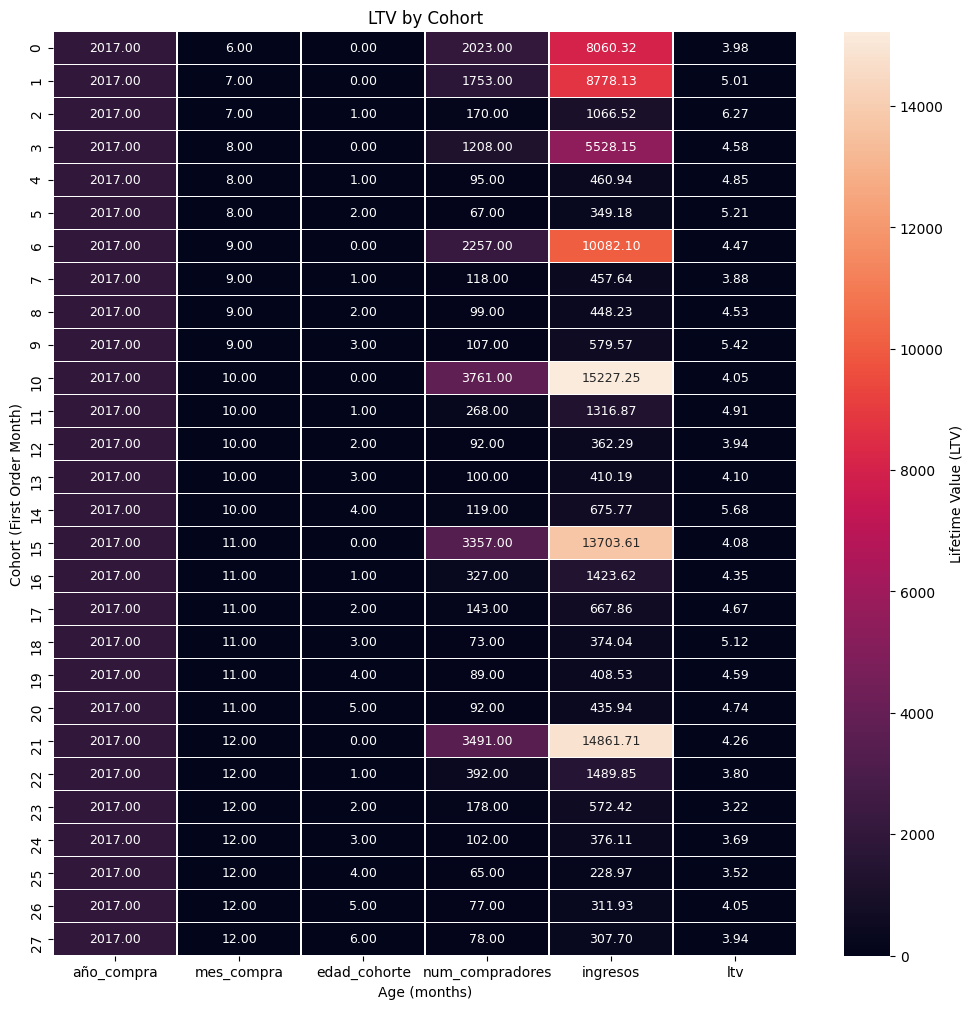

In [ ]:
#Mapa de calor para el 2017
# Redondea los valores a dos decimales y reemplaza los NaN por 0.
cohorts_ltv = cohorte_tamaño_2017.round(2)
# Convierte los índices de 'first_order_month' a cadena para mejorar la visualización en el heatmap.
cohorts_ltv.index = cohorts_ltv.index.astype(str)

# Visualización del Heatmap del LTV
# Visualiza el LTV de las cohortes usando un mapa de calor.
plt.figure(figsize=(12, 12))  # Aumenta el tamaño de la figura si es necesario
ax = sns.heatmap(cohorts_ltv, annot=True, fmt=".2f", linewidths=0.5,
                 cbar_kws={'label': 'Lifetime Value (LTV)'}, annot_kws={"size": 9})
plt.title('LTV by Cohort')
plt.xlabel('Age (months)')
plt.ylabel('Cohort (First Order Month)')

In [ ]:
# Preparar la tabla pivote para la visualización del LTV de cada cohorte por su 'edad' en meses.
cohorts_ltv = cohorte_tamaño_2018.pivot_table(
    index='mes_compra', 
    columns='edad_cohorte', 
    values='ltv', 
    aggfunc='sum'
).cumsum(axis=1)
cohorts_ltv

edad_cohorte,0,1,2,3,4,5,6,7,8,9,10,11
mes_compra,,,,,,,,,,,,
1,3.598820,7.136963,10.436834,14.265168,17.825676,21.950413,26.679219,33.670236,NaN,NaN,NaN,NaN
2,3.616574,7.559894,11.898503,15.963797,20.050498,23.649840,28.413430,33.553752,36.850159,NaN,NaN,NaN
3,3.819572,8.875116,12.482046,17.205082,20.933665,24.600295,28.615506,32.711822,37.677422,41.171485,NaN,NaN
4,3.938446,7.945000,13.767420,17.065420,21.436309,26.756309,30.439574,34.211074,39.648274,44.658880,50.490034,NaN
5,4.296903,9.136509,12.695973,17.381688,23.106613,27.263370,30.841216,33.764549,37.493597,41.763197,45.133197,56.084493
6,NaN,3.420000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Mapa de calor para el 2018
# Redondea los valores a dos decimales y reemplaza los NaN por 0.
cohorts_ltv = cohorte_tamaño_2018.round(2)
# Convierte los índices de 'first_order_month' a cadena para mejorar la visualización en el heatmap.
cohorts_ltv.index = cohorts_ltv.index.astype(str)

NameError: name 'cohorte_tamaño_2018' is not defined

In [ ]:

# Visualización del Heatmap del LTV
# Visualiza el LTV de las cohortes usando un mapa de calor.
plt.figure(figsize=(12, 12))  # Aumenta el tamaño de la figura si es necesario
ax = sns.heatmap(cohorts_ltv, annot=True, fmt=".2f", linewidths=0.5,
                 cbar_kws={'label': 'Lifetime Value (LTV)'}, annot_kws={"size": 9})
plt.title('LTV by Cohort')
plt.xlabel('Age (months)')
plt.ylabel('Cohort (First Order Month)')

### Marketing

#### Dinero invertido

In [ ]:
costos.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [ ]:
#Desglosamos las fechas para identificar los meses
costos['año']=costos['dt'].dt.year
costos['mes']=costos['dt'].dt.month
costos

,source_id,dt,costs,año,mes
0,1,2017-06-01,75.20,2017,6
1,1,2017-06-02,62.25,2017,6
2,1,2017-06-03,36.53,2017,6
3,1,2017-06-04,55.00,2017,6
4,1,2017-06-05,57.08,2017,6
...,...,...,...,...,...
2537,10,2018-05-27,9.92,2018,5
2538,10,2018-05-28,21.26,2018,5
2539,10,2018-05-29,11.32,2018,5
2540,10,2018-05-30,33.15,2018,5


In [ ]:
#Queremos saber cuales han sido los gatos por recurso y por mes.

costos_mes=costos.groupby(['año','mes'])['costs'].sum().reset_index()
costos_mes

,año,mes,costs
0,2017,6,18015.00
1,2017,7,18240.59
2,2017,8,14790.54
3,2017,9,24368.91
4,2017,10,36322.88
5,2017,11,37907.88
6,2017,12,38315.35
7,2018,1,33518.52
8,2018,2,32723.03
9,2018,3,30415.27


In [ ]:
#Costos por recursos para cada mes
costos_mes_recurso=costos.groupby(['año','source_id','mes'])['costs'].sum().reset_index()
costos_mes_recurso

,año,source_id,mes,costs
0,2017,1,6,1125.61
1,2017,1,7,1072.88
2,2017,1,8,951.81
3,2017,1,9,1502.01
4,2017,1,10,2315.75
...,...,...,...,...
79,2018,10,1,614.35
80,2018,10,2,480.88
81,2018,10,3,526.41
82,2018,10,4,388.25


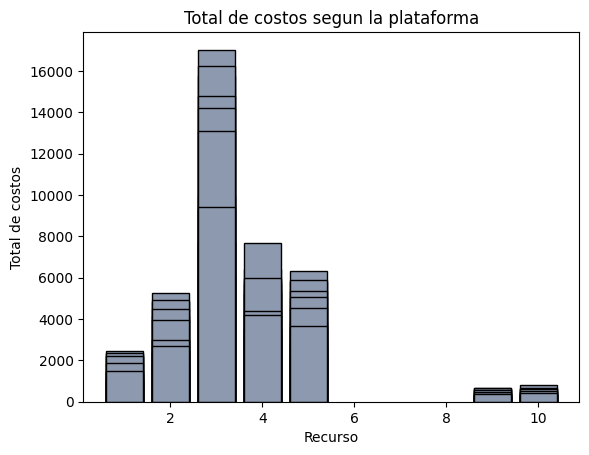

In [ ]:
plt.bar(costos_mes_recurso['source_id'],costos_mes_recurso['costs'], color='#8d99ae', edgecolor='black')


plt.xlabel("Recurso")
plt.ylabel("Total de costos")
plt.title("Total de costos segun la plataforma")
plt.show()

La grafica muestra que el recurso al que mas se ha invertido dinero en marketing es el 3-desktop

In [ ]:
#Total de dinero invertido en marketing 

dinero_invertido=costos['costs'].sum()

print(f"Total de dinero invertido en marketing: $", dinero_invertido)

Total de dinero invertido en marketing: $ 329131.62


#### Dinero invertido por mes


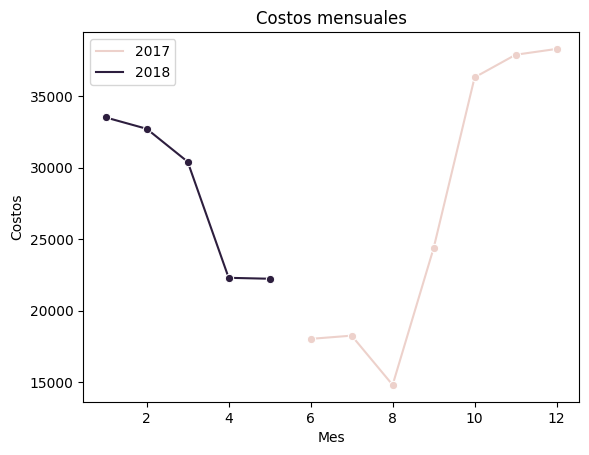

In [ ]:
#Grafica del comportamiento del promedio del ingreso mensual
sns.lineplot(data=costos_mes, x="mes", y="costs", hue= "año", marker="o")

plt.xlabel("Mes")
plt.ylabel("Costos")
plt.title("Costos mensuales")
plt.legend()
plt.show()

<div class="alert alert-block alert-success">
<b>Celdas [43–49]</b> <a class="tocSkip"></a><br>
El desglose de gastos de marketing por fuente y por mes está muy bien realizado. Se aprecian buenas visualizaciones, un manejo correcto de las fechas y una interpretación acertada sobre la disminución de costos. Esto genera valor analítico real para la toma de decisiones.
</div>


Los costos al igual que los ingresos han disminuido para el año 2018

#### CAC

In [ ]:
# Suponemos que la fuente de adquisición de cada usuario es la de su primer registro
usuario_recurso = visitas.sort_values(by='start_ts').groupby('uid').first().reset_index()
usuario_recurso.head()

,uid,device,end_ts,source_id,start_ts,duracion_min,año_inicio,semana_inicio,dia_inicio,mes_inicio,mes_final
0,11863502262781,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,6.0,2018,9,4,3,3
1,49537067089222,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2.0,2018,6,2,2,2
2,297729379853735,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,1.0,2017,23,3,6,6
3,313578113262317,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,18.0,2017,38,1,9,9
4,325320750514679,desktop,2017-09-30 14:38:00,5,2017-09-30 14:29:00,9.0,2017,39,6,9,9


In [ ]:
# Número de clientes adquiridos por fuente
cliente_recurso = usuario_recurso.groupby('source_id')['uid'].nunique()
print("Clientes adquiridos por fuente:")
display(cliente_recurso)

Clientes adquiridos por fuente:


source_id
1      9469
2     17616
3     66116
4     72346
5     49237
6         2
7        32
9      6448
10     6903
Name: uid, dtype: int64

In [ ]:
#costo por fuente

costo_fuente=costos.groupby('source_id')['costs'].sum().reset_index()
costo_fuente

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [ ]:
#Ingresos por fuente

ingresos=ordenes.merge(visitas, on='uid', how='left')
ingreso_fuente=ingresos.groupby('source_id')['revenue'].sum().reset_index()
ingreso_fuente

,source_id,revenue
0,1,2.298200e+06
1,2,2.638189e+06
2,3,2.966880e+05
3,4,4.966902e+05
4,5,1.181477e+06
5,7,1.220000e+00
6,9,3.634225e+04
7,10,1.461923e+04


In [ ]:
#Calculo del CAC
cac=(costo_fuente/cliente_recurso)
cac

source_id
1     2.200155
2     2.429952
3     2.137480
4     0.844188
5     1.051183
6          NaN
7          NaN
9     0.855690
10    0.843472
dtype: float64

#### ROMI

In [ ]:
# Calcular ROMI: (ingresos - gasto) / gasto

romi=(ingreso_fuente-costo_fuente)/costo_fuente
romi

source_id
1     109.313944
2      60.631237
3       1.099381
4       7.132649
5      21.827344
7            NaN
9       5.586736
10      1.510821
dtype: float64

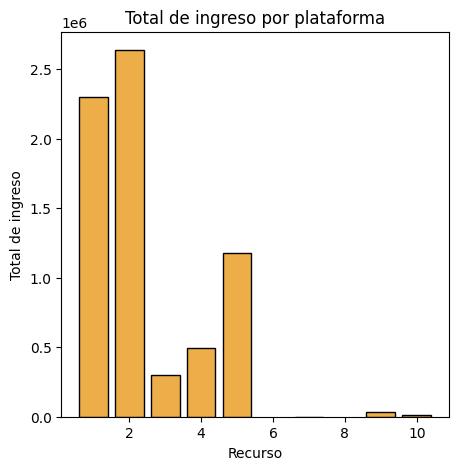

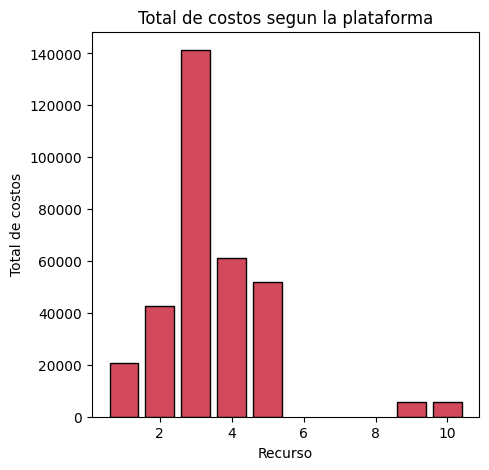

In [ ]:
#Grafica de los ingresos y costos por fuente

plt.figure(figsize=(5,5))
plt.bar(ingreso_fuente['source_id'],ingreso_fuente['revenue'], color='#edae49', edgecolor='black')


plt.xlabel("Recurso")
plt.ylabel("Total de ingreso")
plt.title("Total de ingreso por plataforma")



plt.figure(figsize=(5,5))
plt.bar(costo_fuente['source_id'],costo_fuente['costs'], color='#d1495b', edgecolor='black')


plt.xlabel("Recurso")
plt.ylabel("Total de costos")
plt.title("Total de costos segun la plataforma")
plt.show()




<div class="alert alert-block alert-danger">
<b>Celda [56]</b> <a class="tocSkip"></a><br>
Aquí se produce un error de ejecución debido a que `ingreso_fuente` es una Serie y no un DataFrame, por lo tanto no tiene columnas como `['source_id']` y `['revenue']`. Deberías convertirlo en DataFrame con `.reset_index()` antes de graficar, o acceder a los valores usando `.index` y `.values`.
</div>


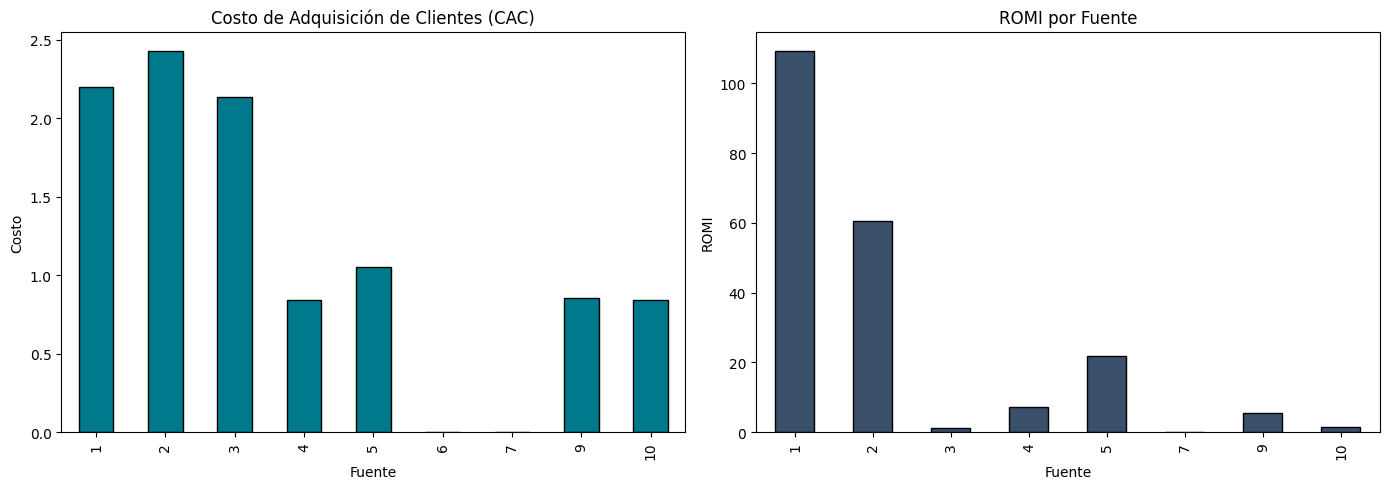

In [ ]:
# Graficar CAC y ROMI
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

cac.plot(kind='bar', ax=ax[0], edgecolor='black', color='#00798c')
ax[0].set_title('Costo de Adquisición de Clientes (CAC)')
ax[0].set_xlabel('Fuente')
ax[0].set_ylabel('Costo')

romi.plot(kind='bar', ax=ax[1], edgecolor='black', color='#3a506b')
ax[1].set_title('ROMI por Fuente')
ax[1].set_xlabel('Fuente')
ax[1].set_ylabel('ROMI')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Celdas [43–49]</b> <a class="tocSkip"></a><br>
Tu analisis te lleva a las conlusiones esperadas. Las fuentes 3 y 10 no son rentables. Buen trabajo Alejandra. 
</div>


# Conclusiones

Tras analizar las métricas, se destacan los siguientes puntos:

Tiempo hasta la conversión: La mayoria de usuarios tienden a volver entre 0 y 1 mes. Sin embargo, hay otros usuarios que tienen a volver hasta 6 meses despues. Que la mayoria de usuarios vuelvan el mismo mes es un indicativo que puede que la mayoria compre en el primer momento.

Costo de Adquisición (CAC): La comparación del CAC entre las fuentes muestra que algunas permiten adquirir clientes a menor costo. Esto sugiere focalizar la inversión en estos canales. Por ejemplo, la grafica muestra que el mayor ingreso viene de la plataforma 2 y es una plataforma a la cual no se le ha invertido demasiado en comparacion a la plataforma 3 que es la que mas dinero se le ha invertido y no muestra un ROMI(ganancias) llamativo, por lo que se considera que no es rentable

Rentabilidad (ROMI): Las fuentes con altos ingresos en comparación con el gasto son las más rentables. Las inversiones en canales con ROMI negativo deben ser evaluadas y optimizadas.


RECOMENDACIONES

-Invertir en fuentes con bajo CAC y alto ROMI: Esto permitirá optimizar la inversión en publicidad y lograr un mayor retorno.
-Impulsar campañas que generen conversiones rápidas: Dado que una gran parte de los usuarios realiza su primera compra en el mismo mes o al mes siguiente, es importante enfocarse en este tipo de campañas.
-Revisar y ajustar inversiones en canales de bajo rendimiento: Canalizar esfuerzos y presupuesto hacia aquellos canales que demuestren mejor rendimiento en conversión y rentabilidad.

<div class="alert alert-block alert-warning">
<b>Lineas de apoyo</b> <a class="tocSkip"></a>  

Alejandra, llegas a los resultados esperados en teminos de conclusiones. No obstante, me parece importante que tengas clara la implementación del LTV para cuando requieras cuantificarlo en tu vida profesional. Abajo tienes de lineas: 
</div>

Text(95.72222222222221, 0.5, 'Cohort (First Order Month)')

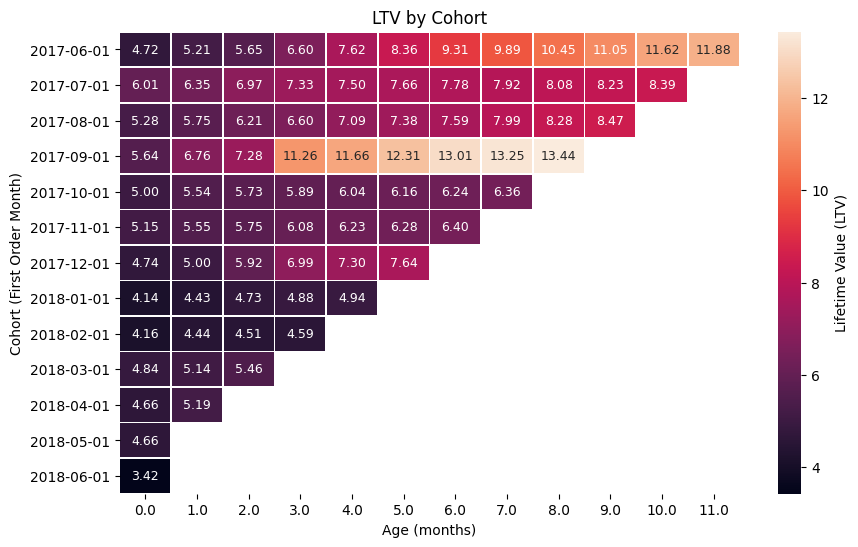

In [ ]:
# Cargar datos de visitas desde un archivo CSV
visits = pd.read_csv('/datasets/visits_log_us.csv')

# Convertir las columnas de tiempos de inicio y fin de las visitas al formato de fecha y hora
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'], format="%Y.%m.%d %H:%M:%S")
visits['End Ts'] = pd.to_datetime(visits['End Ts'], format="%Y.%m.%d %H:%M:%S")

# Renombrar las columnas para mayor claridad
visits = visits.rename(columns={"Device": "device", "End Ts": "session_end_ts", 
                                "Source Id": "source_id", "Start Ts": "session_start_ts", "Uid": "uid"})

# Extraer el mes, la semana y la fecha de inicio de sesión
visits['session_month'] = visits['session_start_ts'].astype('datetime64[M]')
visits['session_week'] = visits['session_start_ts'].astype('datetime64[W]')
visits['session_date'] = visits['session_start_ts'].dt.date

# Encontrar la primera visita de cada usuario
first_visits = visits.groupby('uid').agg({'session_start_ts': 'min'}).reset_index()
first_visits.columns = ['uid', 'first_session_start_ts']

# Extraer la fecha y el mes de la primera sesión
first_visits['first_session_dt'] = first_visits['first_session_start_ts'].dt.date
first_visits['first_session_month'] = first_visits['first_session_start_ts'].astype('datetime64[M]')

# Combinar los datos de las primeras visitas con los datos completos de visitas
visits_full = pd.merge(first_visits, visits, on='uid')

# Calcular la diferencia en meses entre la primera visita y las visitas subsiguientes
visits_full['age_months'] = ((visits_full['session_month'] - visits_full['first_session_month']) / 
                             np.timedelta64(1, 'M')).round().astype('int')

# Cargar datos de pedidos desde un archivo CSV
orders = pd.read_csv('/datasets/orders_log_us.csv')
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
orders = orders.rename(columns={"Buy Ts": "buy_ts", "Revenue": "revenue", "Uid": "uid"})

# Extraer el día y el mes de compra
orders['buy_dt'] = orders['buy_ts'].dt.date
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

# Encontrar la primera compra de cada usuario
first_orders = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_ts']
first_orders['first_order_dt'] = first_orders['first_order_ts'].dt.date
first_orders['first_order_month'] = first_orders['first_order_ts'].astype('datetime64[M]')

# Crear un dataframe con las primeras órdenes y las primeras visitas
buyers = pd.merge(first_visits, first_orders, on='uid')
buyers['first_order_dt'] = pd.to_datetime(buyers['first_order_dt'])
buyers['first_session_dt'] = pd.to_datetime(buyers['first_session_dt'])

# Calcular los días hasta la primera compra
buyers['days_to_first_purchase'] = ((buyers['first_order_ts'] - buyers['first_session_start_ts']) / 
                                    np.timedelta64(1, 'D')).astype('int')

# LTV
# Determinar el tamaño de cada cohorte de compradores
# Agrupa a los compradores por el mes de su primera compra y cuenta los usuarios únicos en cada grupo.
cohort_sizes = buyers.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
# Renombra la columna 'uid' a 'n_buyers' para indicar el número de compradores únicos.
cohort_sizes.rename(columns={'uid': 'n_buyers'}, inplace=True)

# Fusionar las órdenes y compradores, y calcular ingresos por cohorte
# Une los DataFrames 'orders' y 'buyers' usando 'uid' como clave, y agrupa el resultado por mes de la primera orden y mes de orden.
# Calcula la suma de los ingresos para cada grupo.
cohorts = pd.merge(orders, buyers, how='inner', on='uid')\
            .groupby(['first_order_month', 'order_month'])\
            .agg({'revenue': 'sum'}).reset_index()

# Calcular la antigüedad de las cohortes
# Calcula la 'edad' de cada cohorte desde su primera compra, en meses.
cohorts['age_month'] = ((cohorts['order_month'] - cohorts['first_order_month']) / np.timedelta64(1, 'M')).round()
# Actualiza los nombres de las columnas para reflejar los datos que contienen.
cohorts.columns = ['first_order_month', 'order_month', 'revenue', 'age_month']

# Crear el informe de cohortes y calcular el LTV
# Une 'cohort_sizes' con 'cohorts' usando 'first_order_month' como clave.
# Calcula el LTV dividiendo los ingresos por el número de compradores.
cohorts_report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
cohorts_report['ltv'] = cohorts_report['revenue'] / cohorts_report['n_buyers']

# Preparar la tabla pivote para la visualización
# Crea una tabla pivote para visualizar el LTV de cada cohorte por su 'edad' en meses.
cohorts_ltv = cohorts_report.pivot_table(
    index='first_order_month', 
    columns='age_month', 
    values='ltv', 
    aggfunc='sum'
).cumsum(axis=1)
# Redondea los valores a dos decimales y reemplaza los NaN por 0.
cohorts_ltv = cohorts_ltv.round(2)
# Convierte los índices de 'first_order_month' a cadena para mejorar la visualización en el heatmap.
cohorts_ltv.index = cohorts_ltv.index.astype(str)

# Visualización del Heatmap del LTV
# Visualiza el LTV de las cohortes usando un mapa de calor.
plt.figure(figsize=(10, 6))  # Aumenta el tamaño de la figura si es necesario
ax = sns.heatmap(cohorts_ltv, annot=True, fmt=".2f", linewidths=0.5,
                 cbar_kws={'label': 'Lifetime Value (LTV)'}, annot_kws={"size": 9})
plt.title('LTV by Cohort')
plt.xlabel('Age (months)')
plt.ylabel('Cohort (First Order Month)')

<div class="alert alert-block alert-warning">
<b>Lineas de apoyo</b> <a class="tocSkip"></a>  

Para calcular el CAC por fuente puedes echar mano de los siguientes pasos... </div>

CAC medio es: 9.01


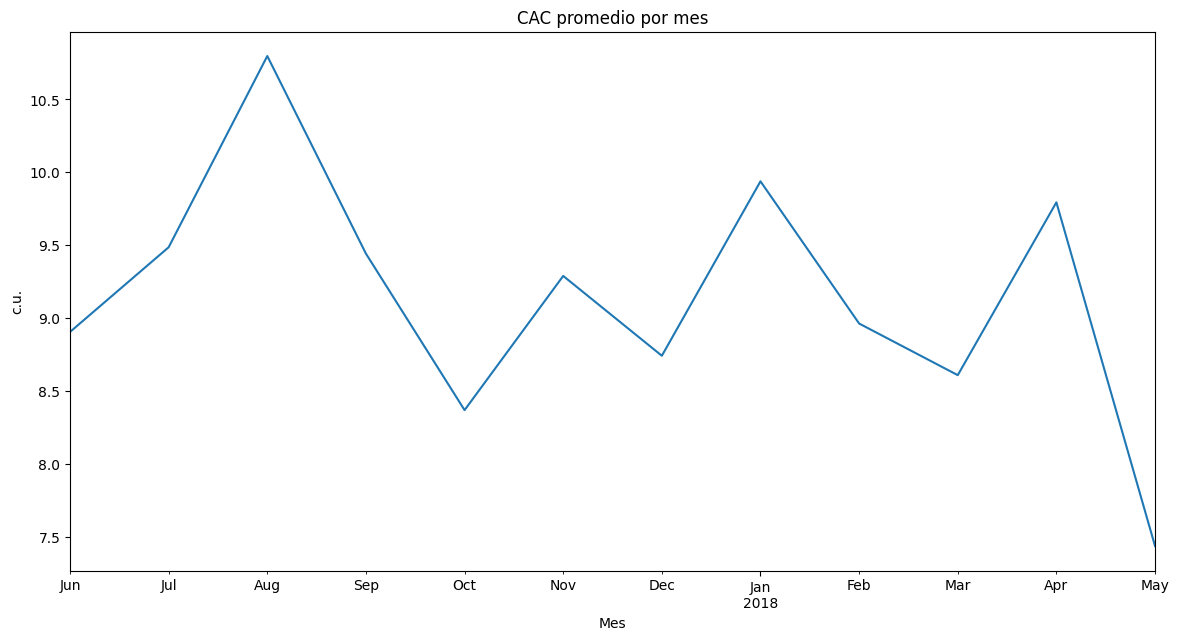

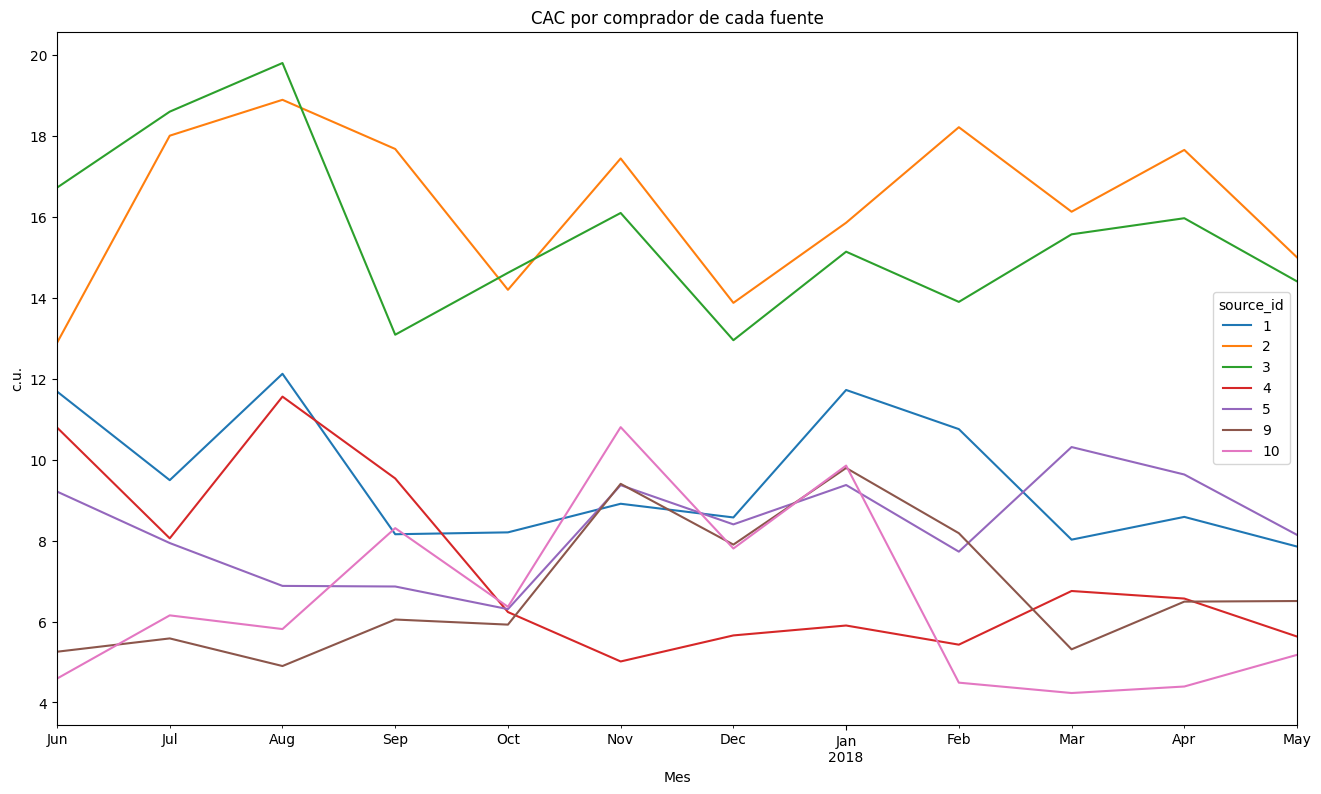

             cac
source_id       
1           9.49
2          16.29
3          15.58
4           7.27
5           8.34
9           6.84
10          6.56


In [ ]:
costs = pd.read_csv('/datasets/costs_us.csv')
costs['dt'] = pd.to_datetime(costs['dt'])
costs['costs_month'] = costs['dt'].astype('datetime64[M]')

# Calcular el CAC medio
print("CAC medio es:", round(costs['costs'].sum() / orders['uid'].nunique(), 2))

# Calcular el CAC por mes
CAC_by_month = pd.merge(costs.groupby('costs_month').agg({'costs': 'sum'}),
                        buyers.groupby('first_order_month').agg({'uid': 'nunique'}),
                        left_index=True, right_index=True)
CAC_by_month['cac'] = CAC_by_month['costs'] / CAC_by_month['uid']

# Gráfico del CAC promedio por mes
CAC_by_month['cac'].plot(figsize=(14, 7), title='CAC promedio por mes', xlabel='Mes', ylabel='c.u.')

# Encontrar la primera fuente por visitante
users = visits_full.sort_values('session_start_ts').groupby('uid').first()
users = users[['source_id']]
buyers = pd.merge(buyers, users, left_on='uid', right_index=True)
buyers_daily = buyers.groupby(['source_id', 'first_order_dt']).agg({'uid': 'count'}).reset_index()
buyers_daily.rename(columns={'uid': 'n_buyers'}, inplace=True)
buyers_daily['first_order_dt'] = pd.to_datetime(buyers_daily['first_order_dt'])

# Calcular el CAC diario por fuente
costs_ = pd.merge(buyers_daily, costs, left_on=['source_id', 'first_order_dt'], right_on=['source_id', 'dt'])
costs_['cac'] = costs_['costs'] / costs_['n_buyers']

# Gráfico de CAC diario por fuente y mes
costs_.pivot_table(index=['costs_month'], columns='source_id', values='cac', aggfunc='mean').plot(
    figsize=(16, 9), title='CAC por comprador de cada fuente', xlabel='Mes', ylabel='c.u.')
plt.show()

# Calcular el CAC promedio por fuente
cac_by_source = costs_.groupby('source_id').agg({'cac': 'mean'}).round(2)
print(cac_by_source)

<div class="alert alert-block alert-warning">
<b>Lineas de apoyo</b> <a class="tocSkip"></a>  

Finalmente el ROMI puede implementarse de la siguiente manera... </div>

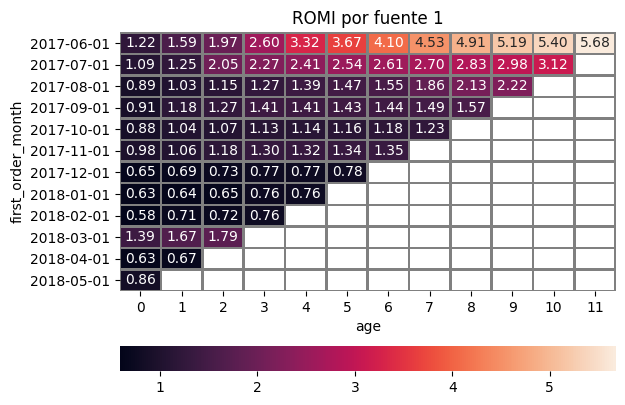

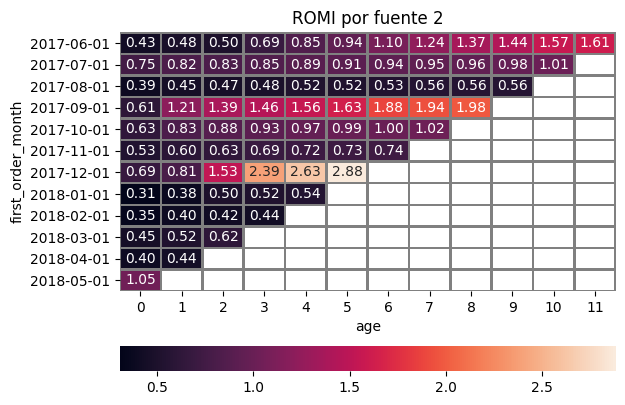

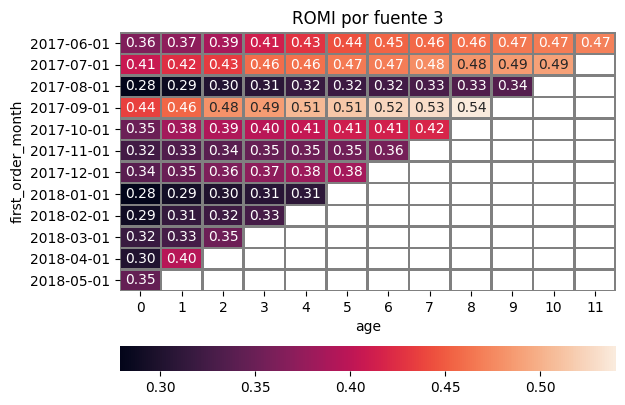

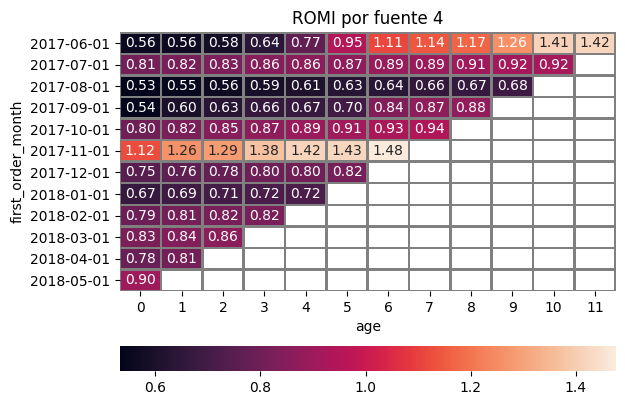

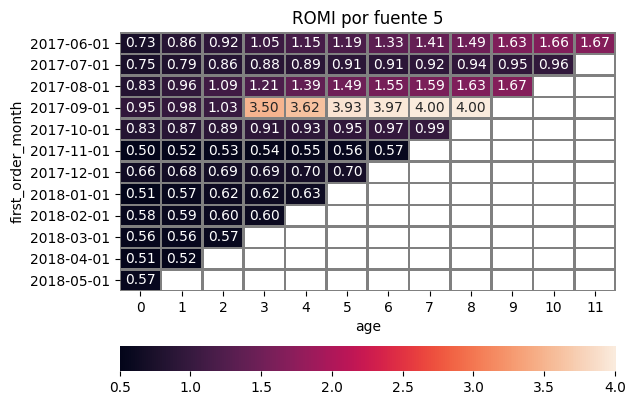

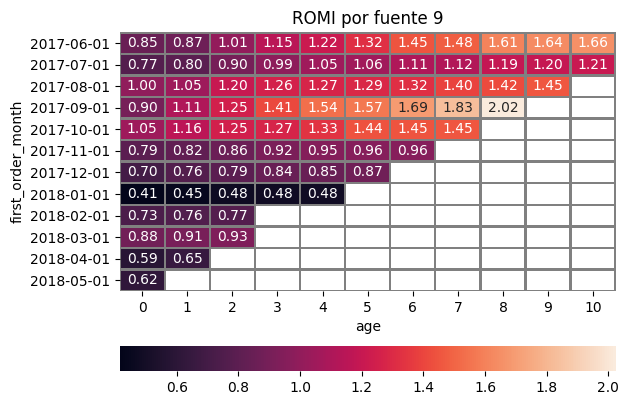

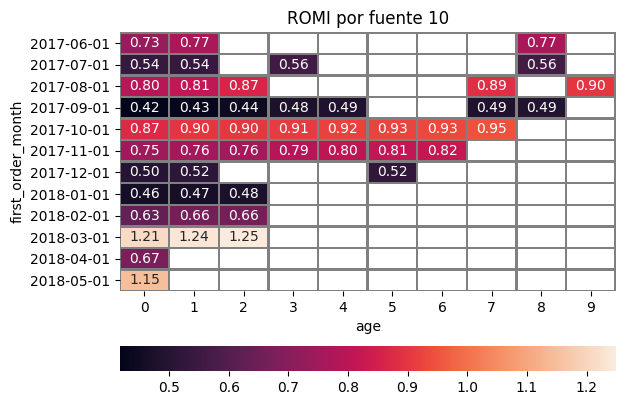

In [ ]:
# Calcular ingresos mensuales por usuario
month_revenue = orders.groupby(['uid', 'order_month']).agg({'revenue': 'sum'}).reset_index()
buyers = buyers.merge(month_revenue, on='uid')

# Iterar a través de cada fuente de tráfico, excepto la fuente número 7
for source, df in buyers.groupby('source_id'):
    if source != 7:
        # Calcular el tamaño de la cohorte para cada fuente y mes de la primera orden
        cohort_sizes_t = (
            df.groupby(['source_id', 'first_order_month'])
            .agg({'uid': 'nunique'})
            .reset_index()
        )
        cohort_sizes_t.columns = ['source_id', 'first_order_month', 'n_buyers']

        # Calcular los ingresos totales por cohorte
        cohorts_revenue_t = (
            df.groupby(['source_id', 'first_order_month', 'order_month'])
            .agg({'revenue': 'sum'})
            .reset_index()
        )
        cohorts_revenue_t.columns = ['source_id', 'first_order_month', 'order_month', 'gp']

        # Fusionar los tamaños de las cohortes con los ingresos por cohortes
        report_romi = pd.merge(cohort_sizes_t, cohorts_revenue_t, on=['source_id', 'first_order_month'])
        report_romi['age'] = (
            report_romi['order_month'] - report_romi['first_order_month']
        ) / np.timedelta64(1, 'M')
        report_romi['age'] = report_romi['age'].round().astype('int')
        report_romi['ltv'] = report_romi['gp'] / report_romi['n_buyers']

        # Calcular costos y CAC para cada cohorte
        report_romi = pd.merge(report_romi, costs.groupby(['source_id', 'costs_month']).agg({'costs': 'sum'}).reset_index(),
                               left_on=['source_id', 'first_order_month'], right_on=['source_id', 'costs_month'])
        report_romi = report_romi.drop(['costs_month'], axis=1)
        report_romi['cac'] = report_romi['costs'] / report_romi['n_buyers']
        report_romi['romi'] = report_romi['ltv'] / report_romi['cac']

        # Crear una tabla pivote de ROMI por edad para cada cohorte
        romi = report_romi\
                .pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')\
                .cumsum(axis=1)
        romi.round(2).fillna('')

        # Configurar el índice como cadena para un mejor formato
        romi.index = romi.index.astype(str)

        # Visualizar el ROMI utilizando un mapa de calor
        sns.heatmap(romi, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws={'orientation': 'horizontal'}
                    ).set(title='ROMI por fuente {}'.format(source))
        plt.show()


<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
Alejandra este es uno de los proyectos más complicados del bootcamp. En ese marco, creo que has hecho un excelente trabajo y te felicito. Espero que las lineas de código que te comparto te sirvan para profundizar en las técnicas que aprendiste en este Sprint. Para mi ha sido un gusto revisar tu proyecto. ¡Felicidades!</div>